# Python for Data Analysis II

## Prereqs

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
# rc component allows plot customization
plt.rc('figure', figsize=(10,6))
from pandas import Series, DataFrame
import pandas as pd

# Enable automatic rendering of plots
%matplotlib inline

In [ ]:
from google.colab import drive
drive_loc = '/content/gdrive'
drive.mount(drive_loc)
files_loc = os.path.join(drive_loc, "MyDrive", "Master", "pdsfiles")
!mkdir -p {files_loc}

## Data wrangling

### Combining & merging of datasets

In [102]:
df1 = pd.DataFrame({
    'data1': range(7),
    'key': list('bbacaab')
})
df2 = pd.DataFrame({
    'data2': range(20, 23),
    'key': list('abd') 
})

In [103]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [104]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


#### Inner join


In [105]:
# Merge
# Intersection of two sets based on key column (by default on columns with the same name)
# Inner join in databases
df1.merge(df2)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [106]:
df2_with_duplicates = pd.DataFrame({
    'data2': range(20, 24),
    'key': list('abda') 
})

In [107]:
df2_with_duplicates

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


In [108]:
df1.merge(df2_with_duplicates)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,2,a,23
5,4,a,20
6,4,a,23
7,5,a,20
8,5,a,23


In [109]:
df3 = pd.DataFrame({
    'data1': range(7),
    'lkey': list('bbacaab')
})
df4 = pd.DataFrame({
    'data2': range(3),
    'rkey': list('abd') 
})

In [110]:
df3.merge(df4, left_on = 'lkey', right_on = 'rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [111]:
df4.merge(df3, left_on = 'rkey', right_on = 'lkey')

,data2,rkey,data1,lkey
0,0,a,2,a
1,0,a,4,a
2,0,a,5,a
3,1,b,0,b
4,1,b,1,b
5,1,b,6,b


#### Outer join


In [112]:
# Merge (how = 'outer')
# Union of two sets based on key column (by default column named 'key')
# Full outer join in databases
df1.merge(df2, how = 'outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,4.0,a,20.0
5,5.0,a,20.0
6,3.0,c,NaN
7,NaN,d,22.0


In [113]:
df1.merge(df2_with_duplicates, how = 'outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,2.0,a,23.0
5,4.0,a,20.0
6,4.0,a,23.0
7,5.0,a,20.0
8,5.0,a,23.0
9,3.0,c,NaN


#### Left join


In [114]:
# Merge (how = 'left')
# Union of two sets based on key column (by default column named 'key') for every element in left set
# Lef inner join in databases
df1.merge(df2, how = 'left')

,data1,key,data2
0,0,b,21.0
1,1,b,21.0
2,2,a,20.0
3,3,c,NaN
4,4,a,20.0
5,5,a,20.0
6,6,b,21.0


#### Join options

In [115]:
df1['X'] = 42
df1

,data1,key,X
0,0,b,42
1,1,b,42
2,2,a,42
3,3,c,42
4,4,a,42
5,5,a,42
6,6,b,42


In [116]:
df2['X'] = 4
df2

,data2,key,X
0,20,a,4
1,21,b,4
2,22,d,4


In [117]:
# On columns with the same name, it suffixed
df1.merge(df2, on = 'key')

,data1,key,X_x,data2,X_y
0,0,b,42,21,4
1,1,b,42,21,4
2,6,b,42,21,4
3,2,a,42,20,4
4,4,a,42,20,4
5,5,a,42,20,4


In [118]:
df1.merge(df2, on = 'key', suffixes = ['_left', '_right'] )

,data1,key,X_left,data2,X_right
0,0,b,42,21,4
1,1,b,42,21,4
2,6,b,42,21,4
3,2,a,42,20,4
4,4,a,42,20,4
5,5,a,42,20,4


In [119]:
# Let's work with indexes
df5 = pd.DataFrame({
    'g': range(4),
    'h': range(8, 12),
}, index = list('abcd'))
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


In [120]:
df1

,data1,key,X
0,0,b,42
1,1,b,42
2,2,a,42
3,3,c,42
4,4,a,42
5,5,a,42
6,6,b,42


In [121]:
# Using index for merging
# left_index / right_index
# Resulting index is left index by default
df1.merge(df5, left_on = 'key', right_index = True)

,data1,key,X,g,h
0,0,b,42,1,9
1,1,b,42,1,9
6,6,b,42,1,9
2,2,a,42,0,8
4,4,a,42,0,8
5,5,a,42,0,8
3,3,c,42,2,10


#### Concat


In [134]:
# Concat appends dataframes in axis 0 by default
pd.concat([df1, df5])

,data1,key,X,g,h
0,0.0,b,42.0,NaN,NaN
1,1.0,b,42.0,NaN,NaN
2,2.0,a,42.0,NaN,NaN
3,3.0,c,42.0,NaN,NaN
4,4.0,a,42.0,NaN,NaN
5,5.0,a,42.0,NaN,NaN
6,6.0,b,42.0,NaN,NaN
a,NaN,NaN,NaN,0.0,8.0
b,NaN,NaN,NaN,1.0,9.0
c,NaN,NaN,NaN,2.0,10.0


In [123]:
a1 = np.arange(0,24).reshape(4,6)
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [124]:
a2 = np.arange(25,37).reshape(4,3)
a2

array([[25, 26, 27],
       [28, 29, 30],
       [31, 32, 33],
       [34, 35, 36]])

In [125]:
a3 = np.concatenate([a1, a2], axis = 1)
a3

array([[ 0,  1,  2,  3,  4,  5, 25, 26, 27],
       [ 6,  7,  8,  9, 10, 11, 28, 29, 30],
       [12, 13, 14, 15, 16, 17, 31, 32, 33],
       [18, 19, 20, 21, 22, 23, 34, 35, 36]])

In [126]:
s1 = pd.Series(range(4), index = list('abcd'))
s2 = pd.Series(range(10, 13), index = list('lmn'))
s3 = pd.Series(range(40, 43), index = list('xyz'))
print(f"{s1}{s2}{s3}")

a    0
b    1
c    2
d    3
dtype: int64l    10
m    11
n    12
dtype: int64x    40
y    41
z    42
dtype: int64


In [127]:
pd.concat([s1, s2, s3])

a     0
b     1
c     2
d     3
l    10
m    11
n    12
x    40
y    41
z    42
dtype: int64

In [128]:
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


#### Exercise
www.transtats.bts.gov


In [135]:
!ls {files_loc}

 df2.pkl
 ks-pds-csv8
 ks-pds-csv9
'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv'
 On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip
'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_4.csv'
 On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip
 readme.html
 s3.pkl
 sales_data.csv
 T100_AIRLINES.csv
 T100_AIRLINES.db
 T100_AIRLINES.xls
 tips.csv


In [130]:
from IPython.display import display, HTML
display(HTML(filename = os.path.join(files_loc, 'readme.html')))

In [136]:
march_file = os.path.join(files_loc, 'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip')
march_file = !ls {os.path.join(files_loc,'*_3.zip')}
march_file

['/content/gdrive/MyDrive/Master/pdsfiles/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip']

In [137]:
import zipfile
zip_file_handle = zipfile.ZipFile(march_file[0])
print(zip_file_handle.namelist())
csv, readme = zip_file_handle.namelist()
csv_file = zip_file_handle.open(csv)
df = pd.read_csv(csv_file)
csv_file.close()
zip_file_handle.close()

['On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv', 'readme.html']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
with open(os.path.join(files_loc, 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_4.csv')) as f:
  df2 = pd.read_csv(f)
df2.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,...,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,2,4,4,6,2020-04-04,G4,20368,G4,NaN,252,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23,14082,1408202,34082,PGD,"Punta Gorda, FL",FL,12,Florida,33,600,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,4,10,5,2020-04-10,G4,20368,G4,NaN,331,14314,1431402,34314,PVU,"Provo, UT",UT,49,Utah,87,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1124,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,4,13,1,2020-04-13,G4,20368,G4,NaN,851,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,14112,1411206,33195,PIE,"St. Petersburg, FL",FL,12,Florida,33,2052,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,4,12,7,2020-04-12,G4,20368,G4,NaN,216,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,14905,1490505,34905,SMX,"Santa Maria, CA",CA,6,California,91,1600,NaN,NaN,NaN,NaN,NaN,1600-1659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2,4,16,4,2020-04-16,G4,20368,G4,NaN,65,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13256,1325602,33256,MFE,"Mission/McAllen/Edinburg, TX",TX,48,Texas,74,1513,NaN,NaN,NaN,NaN,NaN,1500-1559,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df_otp = pd.concat([df, df2])

In [141]:
df_otp.shape

(961611, 110)

#### Duplicates

In [ ]:
df6 = pd.DataFrame({
	'key1': ['one'] * 3 + ['two'] * 4,
	'key2': [1,1,2,3,3,4,4]
})
df6.duplicated()

In [ ]:
# Return rows without duplicates (it considers all the columns). By default returns the first ocurrence
df6.drop_duplicates()

In [ ]:
# Return rows without duplicates (it considers all the columns)
# subset allows to define the columns to consider for duplication
df6.drop_duplicates(subset = 'key1')

In [ ]:
# Return rows without duplicates (it considers all the columns). Define what row to keep among duplicated ones
df6.drop_duplicates(keep='last', subset='key1')

In [ ]:
# Number of different origin airports
df_otp.drop_duplicates(subset = 'OriginAirportID')['OriginAirportID'].count()

In [ ]:
# Number of different routes (from an origin to a destination airport)
df_otp.drop_duplicates(subset = ['OriginAirportID', 'DestAirportID'])['OriginAirportID'].count()

### Bins on Series

In [ ]:
!wget http://bit.ly/ks-pds-csv8 -P {files_loc}

In [ ]:
sales_data_filepath = os.path.join(files_loc, 'sales_data.csv')
!cp {os.path.join(files_loc, 'ks-pds-csv8')} {sales_data_filepath}
!ls {files_loc}

In [ ]:
raw_df = pd.read_csv(sales_data_filepath)
raw_df.head()

In [ ]:
raw_df.shape

In [ ]:
raw_df.describe()

In [ ]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()
df

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
df['ext price'].plot(kind = 'hist')

In [ ]:
# By default the 4 std quantiles
df['ext price'].describe()

In [ ]:
# Quantile-based discretization function.
# The number of value on each interval is the same
# q = Number of quantiles
pd.qcut(df['ext price'], q = 4)

In [ ]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q = 4)

In [ ]:
df['quantile_ex_2'] = pd.qcut(df['ext price'], q = 10, precision = 0)

In [ ]:
df

In [ ]:
df['quantile_ex_1'].value_counts()

In [ ]:
df['quantile_ex_2'].value_counts()

In [ ]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'], q = [0, .2, .4, .6, .8, 1], labels = bin_labels_5)
df

In [ ]:
results, bin_interval_edges = pd.qcut(df['ext price'], q = 5, labels = bin_labels_5, retbins = True)
results_table = pd.DataFrame(zip(results, bin_interval_edges), columns = ['Threshold', 'Tier'])
results_table

In [ ]:
# Clean the dataframe
df = df.drop(columns = ['quantile_ex_1', 'quantile_ex_2', 'quantile_ex_3'])
df

In [ ]:
# Bin values into discrete intervals.
# Intervals are defined by (max - min) / #bins
pd.cut(df['ext price'], bins = 5)

In [ ]:
pd.cut(df['ext price'], bins = 5).value_counts()

### String manipulation

In [ ]:
string = "This is some sentence"
string.split()

In [ ]:
animals = "rhino giraffe molerat elephant cheetah mosquito whale".split()
animals

In [ ]:
df1['animals'] = animals
df1

In [ ]:
# string methods on panda series
animals_series = df1['animals']
animals_series.str

In [ ]:
animals_series.str.capitalize()

In [ ]:
animals_series.str.len()

In [ ]:
animals_series.str.count('o')

In [ ]:
animals_series.str.contains('m')

In [ ]:
df1[animals_series.str.contains('m')]

In [ ]:
series_with_blanks = pd.Series(['    hello', '  goodbye  '])
series_with_blanks.str.strip()

In [ ]:
columns = pd.Series(list(df_otp.columns))
columns[columns.str.lower().str.contains('origin')]

In [ ]:
df_otp[columns[columns.str.lower().str.contains('origin')].tolist()].head()

## Data Aggregation


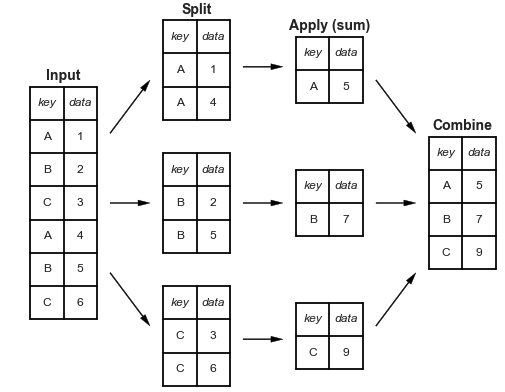


### GroupBy

In [2]:
df = DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': np.random.rand(5),
    'data2': np.random.rand(5)
})
df

,key1,key2,data1,data2
0,a,one,0.052349,0.734872
1,a,two,0.904188,0.641940
2,b,one,0.430392,0.380924
3,b,two,0.872824,0.243035
4,a,one,0.095109,0.717372


In [3]:
grouped = df.groupby('key1')['data1']
grouped

In [5]:
# Calculations does not occur until an operations is applied to SeriesGroupBy
grouped.sum()

key1
a    1.051646
b    1.303215
Name: data1, dtype: float64

In [6]:
means = df.groupby(['key1','key2','data2'])['data1']
means.mean()

key1  key2  data2   
a     one   0.717372    0.095109
            0.734872    0.052349
      two   0.641940    0.904188
b     one   0.380924    0.430392
      two   0.243035    0.872824
Name: data1, dtype: float64

In [7]:
df

,key1,key2,data1,data2
0,a,one,0.052349,0.734872
1,a,two,0.904188,0.641940
2,b,one,0.430392,0.380924
3,b,two,0.872824,0.243035
4,a,one,0.095109,0.717372


In [8]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()


California  2005    0.904188
            2006    0.430392
Ohio        2005    0.462586
            2006    0.095109
Name: data1, dtype: float64

In [9]:
# key2 is not present because mean() does not apply
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.350549,0.698061
b,0.651608,0.311980


### Agg

In [10]:
grouped = df.groupby('key1')
grouped

In [11]:
grouped.agg([np.mean, np.median])

data1               data2          
          mean    median      mean    median
key1                                        
a     0.350549  0.095109  0.698061  0.717372
b     0.651608  0.651608  0.311980  0.311980

In [14]:
# We can use operations on series
grouped['data1'].quantile(0.9)

key1
a    0.742372
b    0.828580
Name: data1, dtype: float64

In [26]:
# We can apply custom functions
def peak_to_peak(arr):
  return arr.max() - arr.min()

In [27]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.851838,0.092932
b,0.442432,0.137889


In [33]:
!wget bit.ly/ks-pds-csv9 -P {files_loc} -O {files_loc}/tips.csv

--2021-01-09 08:29:26--  http://bit.ly/ks-pds-csv9
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=view&id=1CY4NsNdWyXC_PA0VTi0103sJj0zlis9d [following]
--2021-01-09 08:29:26--  https://drive.google.com/uc?export=view&id=1CY4NsNdWyXC_PA0VTi0103sJj0zlis9d
Resolving drive.google.com (drive.google.com)... 74.125.20.101, 74.125.20.138, 74.125.20.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rut6ri8do911le659260642v7tfmfjeo/1610180925000/09168289428562857012/*/1CY4NsNdWyXC_PA0VTi0103sJj0zlis9d?e=view [following]
--2021-01-09 08:29:27--  https://doc-14-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l

In [36]:
tips_filepath = os.path.join(files_loc, 'tips.csv')
tips = pd.read_csv(tips_filepath)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [193]:
grouped = tips.groupby(['sex','smoker'])
for name,data in list(tips.groupby(['sex','smoker'])):
  print(name)

('Female', 'No')
('Female', 'Yes')
('Male', 'No')
('Male', 'Yes')


In [194]:
grouped_tip_pct = grouped['tip_pct']

In [48]:
grouped

In [49]:
grouped_tip_pct

In [50]:
grouped_tip_pct.mean()

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [51]:
grouped_tip_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [63]:
# We can customize columns name
grouped_tip_pct.agg([('media', 'mean'), ('std_deviation', np.std), ('interval', peak_to_peak)])

media  std_deviation  interval
sex    smoker                                   
Female No      0.156921       0.036421  0.195876
       Yes     0.182150       0.071595  0.360233
Male   No      0.160669       0.041849  0.220186
       Yes     0.152771       0.090588  0.674707

In [64]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [67]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [68]:
grouped.agg({
    'tip': np.max,
    'size': 'sum'
})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [72]:
grouped.agg({
    'tip_pct': [np.min, 'max', 'std'],
    'size': [('Sum', 'sum')]
})

tip_pct                     size
                   amin       max       std  Sum
sex    smoker                                   
Female No      0.056797  0.252672  0.036421  140
       Yes     0.056433  0.416667  0.071595   74
Male   No      0.071804  0.291990  0.041849  263
       Yes     0.035638  0.710345  0.090588  150

## Group-wise operations and transformations

In [74]:
df

,key1,key2,data1,data2
0,a,one,0.052349,0.734872
1,a,two,0.904188,0.641940
2,b,one,0.430392,0.380924
3,b,two,0.872824,0.243035
4,a,one,0.095109,0.717372


In [75]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.350549,0.698061
b,0.651608,0.311980


In [76]:
# Merge equals to inner join
people = pd.merge(df, k1_means, left_on = 'key1', right_index = True)
people

,key1,key2,data1,data2,mean_data1,mean_data2
0,a,one,0.052349,0.734872,0.350549,0.698061
1,a,two,0.904188,0.641940,0.350549,0.698061
4,a,one,0.095109,0.717372,0.350549,0.698061
2,b,one,0.430392,0.380924,0.651608,0.311980
3,b,two,0.872824,0.243035,0.651608,0.311980


In [82]:
key = ['one', 'two', 'one', 'one', 'two']
people.groupby(key).mean()

,data1,data2,mean_data1,mean_data2
one,0.192617,0.611056,0.450902,0.569367
two,0.888506,0.442487,0.501078,0.505021


In [83]:
people.groupby('key2').mean()

,data1,data2,mean_data1,mean_data2
key2,,,,
one,0.192617,0.611056,0.450902,0.569367
two,0.888506,0.442487,0.501078,0.505021


In [85]:
people.groupby('key2').transform(np.mean)

,data1,data2,mean_data1,mean_data2
0,0.192617,0.611056,0.450902,0.569367
1,0.888506,0.442487,0.501078,0.505021
4,0.192617,0.611056,0.450902,0.569367
2,0.192617,0.611056,0.450902,0.569367
3,0.888506,0.442487,0.501078,0.505021


In [87]:
def demean(arr):
  return arr - arr.mean()

demeaned = people.groupby('key2').transform(demean)
demeaned

,data1,data2,mean_data1,mean_data2
0,-0.140267,0.123816,-0.100353,0.128694
1,0.015682,0.199452,-0.150529,0.193041
4,-0.097507,0.106316,-0.100353,0.128694
2,0.237775,-0.230132,0.200706,-0.257388
3,-0.015682,-0.199452,0.150529,-0.193041


In [90]:
demeaned.groupby(key).mean()

,data1,data2,mean_data1,mean_data2
one,-9.251859e-18,0.0,5.551115e-17,-1.850372e-17
two,-5.551115e-17,0.0,-2.775558e-17,-2.775558e-17


In [92]:
# Exercice: Get top 5 tips per percentage
def top(df, n = 5, column = 'tip_pct'):
  return df.sort_values(by=column)[-n:]
top(tips, 6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [95]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [98]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [101]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## Data Analysis using bins

In [144]:
frame = pd.DataFrame({
    'data1': np.random.rand(1000),
    'data2': np.random.rand(1000)
})
frame.head()

,data1,data2
0,0.533529,0.864330
1,0.442353,0.185780
2,0.263051,0.254839
3,0.351770,0.378432
4,0.823462,0.195582


In [147]:
factor = pd.cut(frame['data1'], 4)
factor

0        (0.5, 0.749]
1         (0.25, 0.5]
2         (0.25, 0.5]
3         (0.25, 0.5]
4      (0.749, 0.999]
            ...      
995      (0.5, 0.749]
996       (0.25, 0.5]
997    (0.749, 0.999]
998    (0.749, 0.999]
999    (0.749, 0.999]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64]): [(-0.000585, 0.25] < (0.25, 0.5] < (0.5, 0.749] < (0.749, 0.999]]

In [154]:
def get_stats(group):
  return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [159]:
grouped = frame['data1'].groupby(factor)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-0.000585, 0.25]",0.000413,0.249163,244.0,0.129439
"(0.25, 0.5]",0.251852,0.497735,235.0,0.365638
"(0.5, 0.749]",0.499792,0.749330,264.0,0.625651
"(0.749, 0.999]",0.750841,0.999056,257.0,0.874870


In [161]:
grouping = pd.qcut(frame['data1'], q = 10, labels = False)

In [162]:
grouped = frame['data1'].groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,0.000413,0.108080,100.0,0.058303
1,0.109665,0.209763,100.0,0.157152
2,0.210089,0.294221,100.0,0.254338
3,0.294881,0.406505,100.0,0.347822
4,0.407205,0.521671,100.0,0.464969
5,0.522914,0.612695,100.0,0.567159
6,0.613262,0.714243,100.0,0.661397
7,0.714674,0.804861,100.0,0.758502
8,0.805260,0.901126,100.0,0.854260


## Manage NaN values in Data Analysis

In [166]:
s = pd.Series(np.random.rand(6))
s

0    0.909868
1    0.978158
2    0.199123
3    0.877152
4    0.785141
5    0.654042
dtype: float64

In [167]:
s[::2] = np.nan
s

0         NaN
1    0.978158
2         NaN
3    0.877152
4         NaN
5    0.654042
dtype: float64

In [168]:
# We can fill up NaN values
s.fillna(s.mean())

0    0.836451
1    0.978158
2    0.836451
3    0.877152
4    0.836451
5    0.654042
dtype: float64

In [205]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
         'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data

Ohio         -0.292314
New York     -1.003599
Vermont       1.635619
Florida       1.080196
Oregon        0.181604
Nevada       -1.619660
California   -0.004583
Idaho         0.471571
dtype: float64

In [206]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.292314
New York     -1.003599
Vermont            NaN
Florida       1.080196
Oregon        0.181604
Nevada             NaN
California   -0.004583
Idaho              NaN
dtype: float64

In [207]:
data.groupby(group_key).mean()

East   -0.071905
West    0.088510
dtype: float64

In [208]:
fill_mean = lambda g: g.fillna(g.mean())
data = data.groupby(group_key).apply(fill_mean)
data

Ohio         -0.292314
New York     -1.003599
Vermont      -0.071905
Florida       1.080196
Oregon        0.181604
Nevada        0.088510
California   -0.004583
Idaho         0.088510
dtype: float64

In [209]:
fill_values = {
    'East': 0.5,
    'West': -1
}
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
fill_func = lambda g: g.fillna(fill_values[g.name])
data = data.groupby(group_key).apply(fill_func)
data

Ohio         -0.292314
New York     -1.003599
Vermont       0.500000
Florida       1.080196
Oregon        0.181604
Nevada       -1.000000
California   -0.004583
Idaho        -1.000000
dtype: float64

In [210]:
for name, d in list(data.groupby(group_key)):
  print(name)
  print(d)

East
Ohio       -0.292314
New York   -1.003599
Vermont     0.500000
Florida     1.080196
dtype: float64
West
Oregon        0.181604
Nevada       -1.000000
California   -0.004583
Idaho        -1.000000
dtype: float64


## Pivot Tables

In [211]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [212]:
tips.pivot_table(['tip_pct', 'size'], index = ['sex', 'day'], columns = ['smoker'])

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [213]:
tips.pivot_table(['tip_pct', 'size'], index = ['sex', 'day'], columns = ['smoker'], margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [214]:
tips.pivot_table(['tip_pct', 'size'], index = ['sex', 'smoker'], columns = ['day'], 
                 aggfunc = len,
                 margins=True)

size                   tip_pct                         
day            Fri Sat Sun Thur  All     Fri   Sat   Sun  Thur    All
sex    smoker                                                        
Female No        2  13  14   25   54     2.0  13.0  14.0  25.0   54.0
       Yes       7  15   4    7   33     7.0  15.0   4.0   7.0   33.0
Male   No        2  32  43   20   97     2.0  32.0  43.0  20.0   97.0
       Yes       8  27  15   10   60     8.0  27.0  15.0  10.0   60.0
All             19  87  76   62  244    19.0  87.0  76.0  62.0  244.0

In [219]:
tips.pivot_table(['size'], index = ['time', 'sex', 'smoker'], columns = ['day'], 
                 aggfunc = sum)

size                   
day                    Fri   Sat    Sun  Thur
time   sex    smoker                         
Dinner Female No       2.0  30.0   43.0   2.0
              Yes      8.0  33.0   10.0   NaN
       Male   No       4.0  85.0  124.0   NaN
              Yes     12.0  71.0   39.0   NaN
Lunch  Female No       3.0   NaN    NaN  60.0
              Yes      6.0   NaN    NaN  17.0
       Male   No       NaN   NaN    NaN  50.0
              Yes      5.0   NaN    NaN  23.0

In [220]:
tips.pivot_table(['size'], index = ['time', 'sex', 'smoker'], columns = ['day'], 
                 aggfunc = sum,
                 fill_value = 0)

size              
day                   Fri Sat  Sun Thur
time   sex    smoker                   
Dinner Female No        2  30   43    2
              Yes       8  33   10    0
       Male   No        4  85  124    0
              Yes      12  71   39    0
Lunch  Female No        3   0    0   60
              Yes       6   0    0   17
       Male   No        0   0    0   50
              Yes       5   0    0   23